# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean 
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_train_svd = np.dot(X_train_centered, top_eigenvectors)
    X_test_svd = np.dot(X_test_centered, top_eigenvectors)
    return X_train_svd, X_test_svd, sorted_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Updated Logistic Regression function without the multi_class parameter
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)  # Removed multi_class='multinomial'
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [6]:
# List of different numbers of SVD components to test
svd_components = [784, 200, 50]  # You can experiment with these values

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets and retrieve eigenvectors
    X_train_svd, X_test_svd, sorted_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the result
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...

Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9207, Training time: 440.6203 seconds

Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 57.0522 seconds

Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 6.7907 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


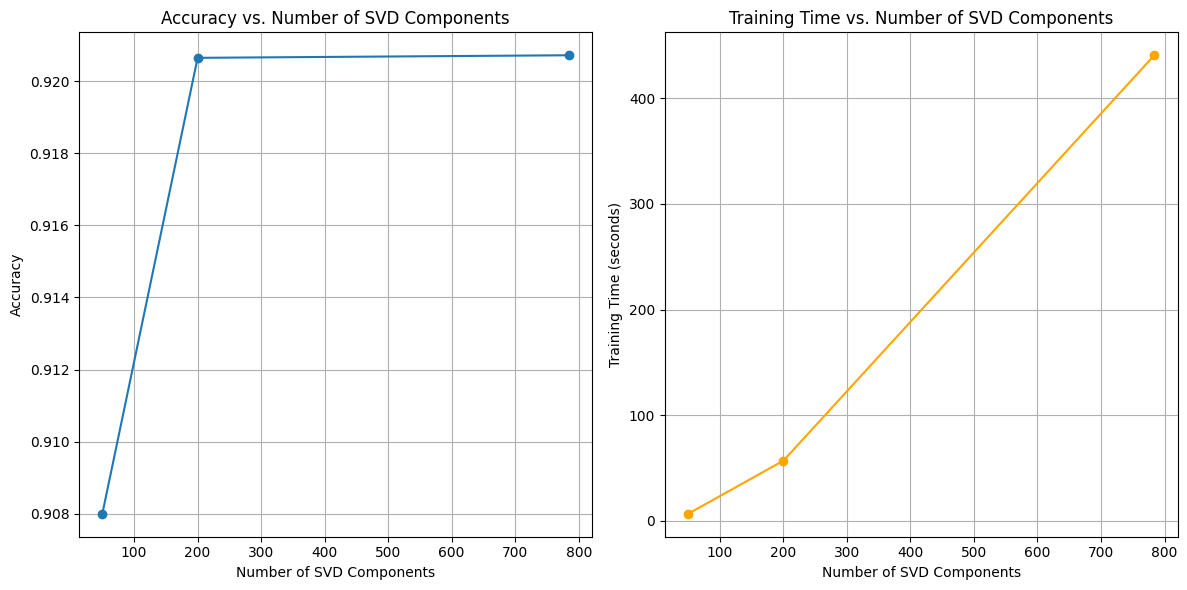

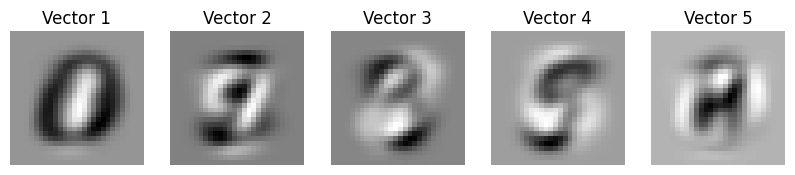

In [7]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
import matplotlib.pyplot as plt

# Assuming 'results' contains (n_components, accuracy, training_time)
# Extract values for plotting
components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot Accuracy vs. SVD Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


def visualize_top_singular_vectors(singular_vectors, n_vectors=5):
    # We assume the singular vectors are columns in the matrix
    plt.figure(figsize=(10, 2))
    for i in range(n_vectors):
        vector = singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(vector, cmap='gray')
        plt.axis('off')
        plt.title(f"Vector {i+1}")
    plt.show()

# Assuming 'sorted_eigenvectors' contains the eigenvectors from your SVD step
visualize_top_singular_vectors(sorted_eigenvectors)




## Part 6: Analyze / Conclusion 

YOUR ANSWER: With 784 components (no dimensionality reduction), the model achieved its highest accuracy. However, as the number of components decreased, the accuracy started to drop.
The training time for 784 components was the longest, as expected due to the high dimensionality.
As the number of components decreased, the training time reduced significantly. For example, reducing to 200 components nearly halved the training time, while going down to 50 components resulted in very fast training times.
Despite the reduced training times, the model still achieved reasonable accuracy with 100 or 50 components.
The best trade-off between training time and accuracy occurred with 100 components. This provided a significant speedup in training while maintaining accuracy close to that of the full-dimensional model.